## Analysis and Prediction Model of Fuel Consumption and Carbon Dioxide Emissions of Light-Duty Vehicles

### Summary of Techniques used

Data from the Open Government of Canada is collected on light duty vehicles, cleaned and combined into one spreadsheet (vehicles between 2017-2021). Descriptive statistics (mean, median, mode) and dispersion statistics (std, variance, range) are computed. Inferential statistics: t-test, ANOVA, correlation, Chi-Square. 

### Machine learning techniques used

#### Single variable
1. Time series regression, persistence models (walk forward validation), autoregression models (stats models), optimized autoregression (walk-forward over time steps). 
2. Linear Regression: using the sklearn model and the dataset is split into training and testing sets with 80%:20% ratio;
3. Univariate Polynomial Regression: using the sklearn model and 5 different degrees (from Degree 1 to Degree 5).

#### Multiple variables
1. Multiple Linear Regression: using the sklearn model and the dataset is split into training and testing sets with 80%:20% ratio;
2. Logarithmic Regression: using the sklearn model with log transformed predictor values and exponential transformed predictor values;
3. Exponential Regression: the dataset is split into training and testing sets with 75%:25% ratio;
4. Transformation of data: the dataset is split into training and testing sets with 75%:25% ratio;
5. Multivariate Polynomial Regression: using the sklearn model and 5 different degrees (from Degree 1 to Degree 5).
    
 
#### Deep learning
Convolutional Neural Network (CNN) is used in this study to predict a variable from multiple variables. Since CNN is normally used for image classification, to use CNN for regression problems, this research uses a one-dimensional convolutional network by reshaping input data.

#### Target variable

Total fuel consumption and CO2 emissions.

#### Function

ML as a function of data of engine size, number of cylinders, fuel consumption in a city and on a highway. Moreover, total fuel consumption and CO2 emission data were used to predict each other.

#### Evaluation of predictive accuracy: 

Efficiency and error statistics analysis using Nash-Sutcliffe efficiency coefficient. Bias, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE). 

### Reference

Hien NLH, Kor A-L. Analysis and Prediction Model of Fuel Consumption and Carbon Dioxide Emissions of Light-Duty Vehicles. Applied Sciences. 2022; 12(2):803. https://doi.org/10.3390/app12020803 


In [38]:
import sys, os
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sys.path.append(os.path.abspath(os.path.join('..','./data/', './clean-data/')))
paths = sys.path
clean_path = [item for item in paths if "machine-learning-capstone\\data\\clean-data" in item]
clean_data = clean_path[0]

file_name_2022_1995 = "1995_2022_vehicle_fuel_consumption.csv"

master_df = pd.read_csv(Path(clean_data,f'{file_name_2022_1995}'))
master_df['number_of_gears'].fillna(0, inplace=True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     26159 non-null  int64  
 1   make_                          26159 non-null  object 
 2   model.1_                       26159 non-null  object 
 3   vehicleclass_                  26159 non-null  object 
 4   enginesize_(l)                 26159 non-null  float64
 5   cylinders_                     26159 non-null  float64
 6   transmission_                  26159 non-null  object 
 7   fuel_type                      26159 non-null  object 
 8   fuelconsumption_city(l/100km)  26159 non-null  float64
 9   fuelconsumption_hwy(l/100km)   26159 non-null  float64
 10  fuelconsumption_comb(l/100km)  26159 non-null  float64
 11  fuelconsumption_comb(mpg)      26159 non-null  int64  
 12  co2emissions_(g/km)            26159 non-null 

In [11]:
# Subset data for vehicles between 2017 and 2021

subset_of_data = master_df[(master_df["model_year"]>=2017) & (master_df['model_year']<=2021)]

subset_of_data.head()

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating,transmission_type,number_of_gears,mapped_fuel_type,type_of_wheel_drive
955,2021,acura,ilx,compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6.0,3.0,automated manual,8.0,premium gasoline,unspecified
956,2021,acura,nsx,two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26,256,4.0,3.0,automated manual,9.0,premium gasoline,unspecified
957,2021,acura,rdx sh-awd,suv - small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive
958,2021,acura,rdx sh-awd a-spec,suv - small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive
959,2021,acura,tlx sh-awd,compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive


In [19]:
# compute "Total fuel consumption (l/100 km) as the average of fuelconsumption_city(l/100km)	fuelconsumption_hwy(l/100km)	
subset_copy = subset_of_data.copy()
subset_copy['fuelconsumption_total(l/100km)'] = (subset_copy['fuelconsumption_city(l/100km)'] + subset_copy['fuelconsumption_hwy(l/100km)'])/2

### Descriptive statistics (mean, median, mode) and dispersion statistics (std, variance, range) are computed

In [20]:
subset_copy.describe()

,model_year,enginesize_(l),cylinders_,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating,number_of_gears,fuelconsumption_total(l/100km)
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,2018.931649,3.139561,5.627497,12.425343,9.088602,10.922777,27.560713,252.859185,4.566197,4.623188,7.022131,10.756972
std,1.401213,1.354059,1.895585,3.384607,2.111673,2.773325,7.352223,59.656089,1.664995,1.807754,1.945612,2.707586
min,2017.000000,0.900000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000,0.000000,3.950000
25%,2018.000000,2.000000,4.000000,10.100000,7.600000,9.000000,22.000000,211.000000,3.000000,3.000000,6.000000,8.900000
50%,2019.000000,3.000000,6.000000,12.000000,8.800000,10.600000,27.000000,248.000000,5.000000,5.000000,7.000000,10.400000
75%,2020.000000,3.700000,6.000000,14.400000,10.300000,12.600000,31.000000,291.000000,5.000000,6.000000,8.000000,12.350000
max,2021.000000,8.400000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,8.000000,10.000000,25.600000


### Average data of different vehicle brands

In [21]:
subset_copy.groupby("make_").mean()

,model_year,enginesize_(l),cylinders_,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating,number_of_gears,fuelconsumption_total(l/100km)
make_,,,,,,,,,,,,
acura,2018.960784,2.968627,5.254902,10.837255,8.513725,9.798039,29.137255,229.490196,5.000000,4.392157,8.549020,9.675490
alfa romeo,2019.060606,2.203030,4.545455,11.178788,8.154545,9.784848,29.424242,229.969697,5.000000,3.090909,7.575758,9.666667
aston martin,2019.115385,4.984615,10.461538,15.896154,10.915385,13.634615,21.076923,320.500000,2.961538,3.576923,7.884615,13.405769
audi,2019.058511,2.775532,5.537234,12.162234,8.679255,10.595213,27.345745,247.670213,4.590426,4.670213,7.335106,10.420745
bentley,2019.000000,5.393939,9.939394,18.727273,11.521212,15.481818,18.606061,361.666667,2.000000,3.303030,8.000000,15.124242
bmw,2018.933718,3.188473,6.138329,12.808069,9.055331,11.122478,26.172911,260.587896,4.291066,4.498559,7.610951,10.931700
bugatti,2019.833333,8.000000,16.000000,27.450000,17.550000,22.983333,12.500000,538.833333,1.000000,1.000000,7.000000,22.500000
buick,2018.854839,2.322581,4.548387,10.970968,8.212903,9.720968,29.483871,228.161290,5.064516,5.322581,7.129032,9.591935
cadillac,2018.971429,3.183810,5.409524,12.624762,8.824762,10.906667,26.361905,256.257143,4.295238,5.161905,8.485714,10.724762


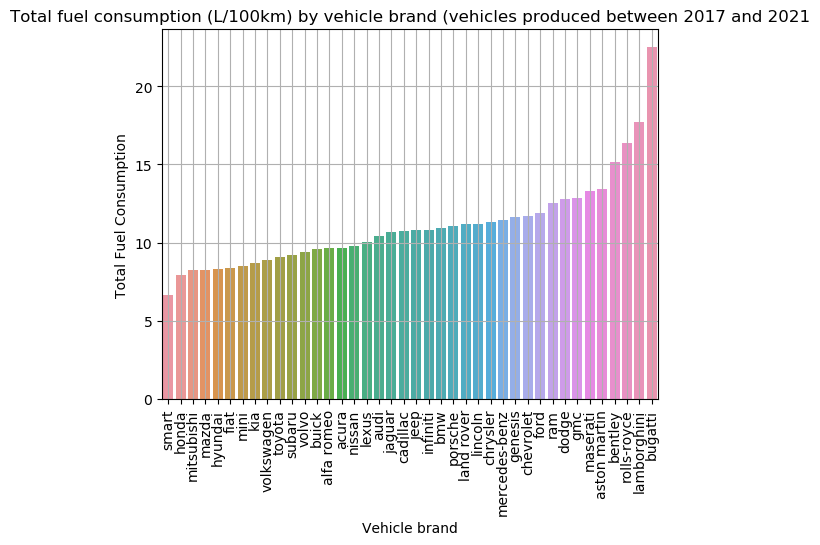

In [48]:
sorted_fuel_cons = subset_copy.groupby("make_").mean()['fuelconsumption_total(l/100km)'].reset_index().sort_values(by='fuelconsumption_total(l/100km)')
sns.barplot(data=sorted_fuel_cons, x="make_", y="fuelconsumption_total(l/100km)")
plt.xticks(rotation=90)
plt.title("Total fuel consumption (L/100km) by vehicle brand (vehicles produced between 2017 and 2021")
plt.ylabel("Total Fuel Consumption")
plt.xlabel("Vehicle brand")
plt.grid(True)
plt.show()

### Inferential statistics: t-test, ANOVA, correlation, Chi-Square.